#Doing Derivative In Spectral Domain:

#Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})


In [2]:
n = 128
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative

In [3]:
## Approximate derivative using finite difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx
    
dfFD[-1] = dfFD[-2]

In [4]:

## Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa) # Re-order fft frequencies
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


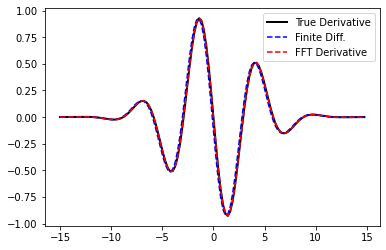

In [5]:
## Plots
plt.plot(x,df.real,color='k',LineWidth=2,label='True Derivative')
plt.plot(x,dfFD.real,'--',color='b',LineWidth=1.5,label='Finite Diff.')
plt.plot(x,dfFFT.real,'--',color='r',LineWidth=1.5,label='FFT Derivative')
plt.legend()
plt.show()

#Heat Equation 

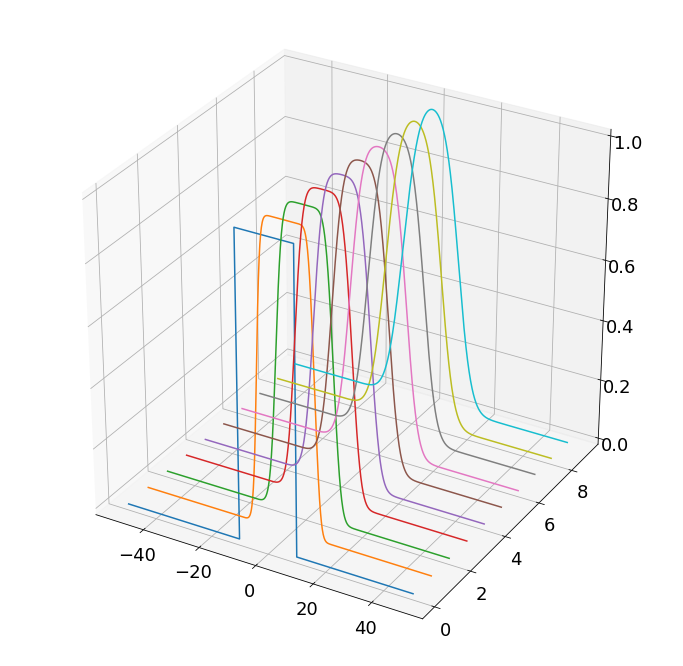

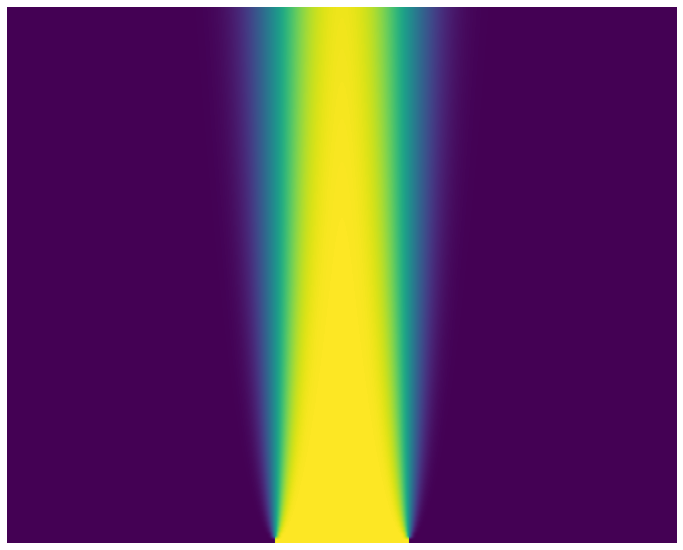

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

a = 1    # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

# Initial condition
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)

# SciPy's odeint function doesn't play well with complex numbers, so we recast 
# the state u0hat from an N-element complex vector to a 2N-element real vector
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real    

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

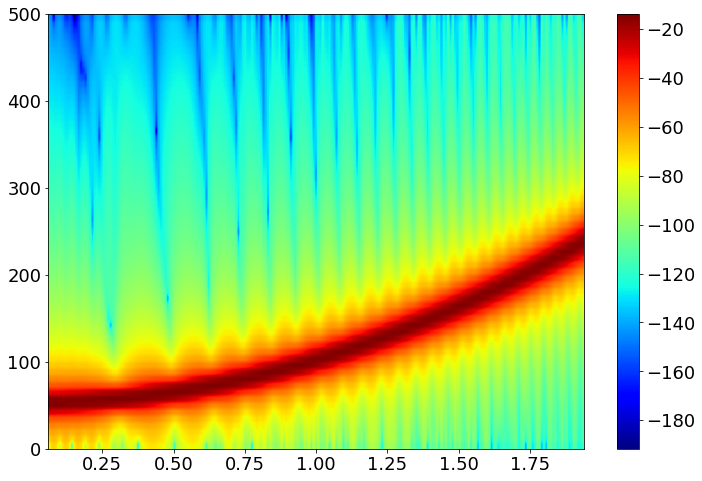

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

dt = 0.001
t = np.arange(0,2,dt)
f0 = 50
f1 = 250
t1 = 2
x = np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))

plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120,cmap='jet')
plt.colorbar()
plt.show()

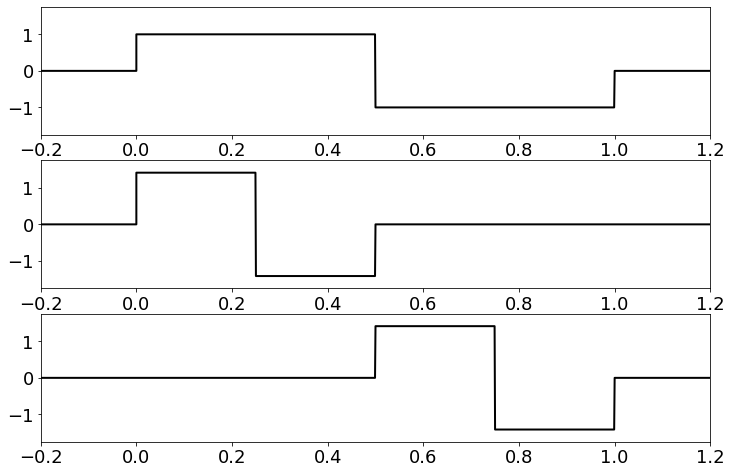

In [8]:
x = np.arange(0,1,0.001)
n = len(x)
n2 = int(np.floor(n/2))
n4 = int(np.floor(n/4))

f10 = np.zeros_like(x)
f10[:n2] = 1
f10[n2:] = -1

f21 = np.zeros_like(x)
f21[:n4] = 1
f21[n4:n2] = -1
f21 = f21 * np.sqrt(2)

f22 = np.zeros_like(x)
f22[n2:(n2+n4)] = 1
f22[(n2+n4):] = -1
f22 = f22 * np.sqrt(2)

# x = np.concatenate((-1, 0, x, 1, 2))
x = np.append([-1,0],x)
x = np.append(x,[1,2])

f10 = np.pad(f10, (2, 2), 'constant')
f21 = np.pad(f21, (2, 2), 'constant')
f22 = np.pad(f22, (2, 2), 'constant')

fig,axs = plt.subplots(3,1)
axs[0].plot(x,f10,color='k',LineWidth=2)
axs[0].set_xlim(-0.2,1.2)
axs[0].set_ylim(-1.75,1.75)
axs[1].plot(x,f21,color='k',LineWidth=2)
axs[1].set_xlim(-0.2,1.2)
axs[1].set_ylim(-1.75,1.75)
axs[2].plot(x,f22,color='k',LineWidth=2)
axs[2].set_xlim(-0.2,1.2)
axs[2].set_ylim(-1.75,1.75)
plt.show()

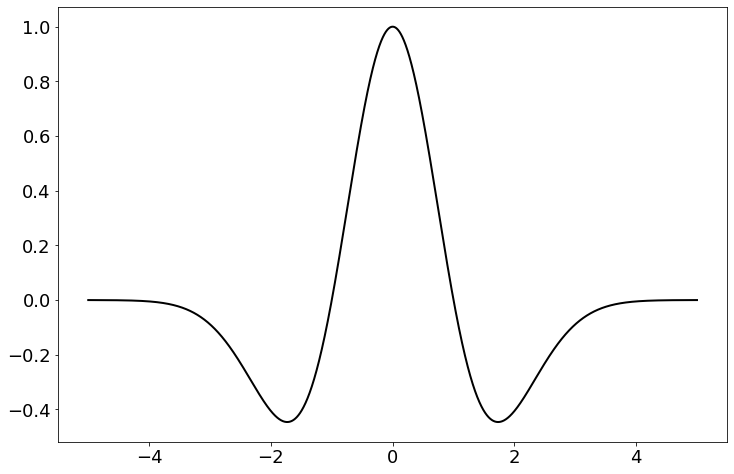

In [9]:
x = np.arange(-5,5,0.001)
fMexHat = (1-np.power(x,2)) * np.exp(-np.power(x,2)/2)
plt.plot(x,fMexHat,color='k',LineWidth=2)
plt.show()